In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# reading pickle file
df = pd.read_pickle('Cleaned_Bmw_Data.pkl')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              20640 non-null  int64   
 1   model             20640 non-null  object  
 2   trim              20640 non-null  object  
 3   body              20640 non-null  uint8   
 4   transmission      20640 non-null  uint8   
 5   state             20640 non-null  category
 6   condition         20640 non-null  float64 
 7   odometer          20640 non-null  float64 
 8   color             20640 non-null  uint8   
 9   interior          20640 non-null  uint8   
 10  seller            20640 non-null  category
 11  mmr               20640 non-null  int64   
 12  selling_price     20640 non-null  int64   
 13  sale_date_only    20640 non-null  object  
 14  sale_time_only    20640 non-null  object  
 15  sale_year         20640 non-null  int32   
 16  car_age           2064

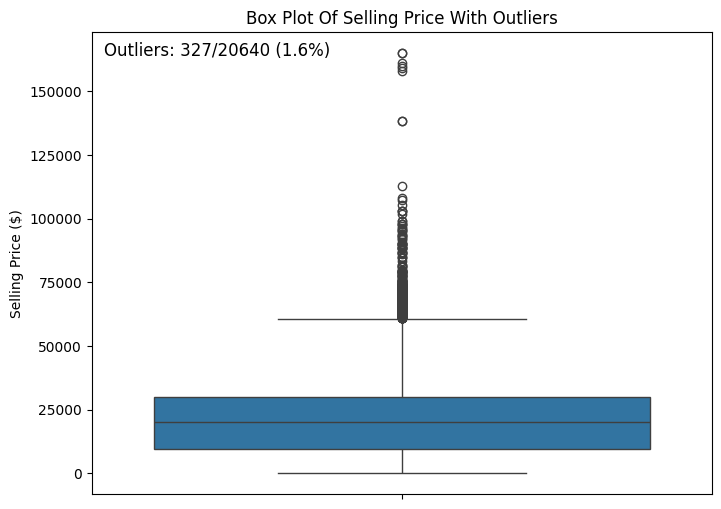

box plot upper bound: 60900.0
car models: , ['6 Series Gran Coupe' 'M5' '6 Series' 'Unknown' 'M4' 'M6' 'M6 Gran Coupe'
 'X5' 'alp' '7 Series' '5 Series' 'X6' 'i8' 'M3' 'ActiveHybrid 7' 'X6 M'
 'X5 M' '4 Series' '3 Series' '2 Series']
car years: , [2014 2013 2015 2012]
car odometer: , [ 2641. 14943.  8819. 10736. 16360. 13205.  7305.  7766.  8037. 12172.
  9837. 13386. 15161.  8891. 19499. 15727. 12095.  3780. 16326.  3513.
  4488.  4206.  3260.  2922.  3408.  7338.  9225. 10166.  6034.  5310.
  2307.  7913.  2622.  4750. 17280.  7153.  5844.  3119.   387.   414.
  4796.  1118.   841.  1911.   361.   243.  5216.   795.  4586.  1511.
  6634.   290.  9167.   511.   594.   207.  3622. 10834.   260.  7334.
  1018.   602. 10681. 32388. 16377.  5185. 13033.  8615.  6104.  2963.
  4765.  2994.  3905.  8128.  2423.  3313.  4839.  5079.  3892.  3318.
  2863. 12029.  3086.  3129.  8292. 14144.  1789.  5734.  2077.  6881.
 10221. 13485.  6160.  1182.    60. 16536.  5039.  9455.  2664.  7066.
  531

In [4]:
# creating a box plot to show outliers in selling price column
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['selling_price'])
plt.title('Box Plot Of Selling Price With Outliers')
plt.ylabel('Selling Price ($)')

# Calculating outliers using IQR
Q1 = df['selling_price'].quantile(0.25)
Q3 = df['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)

# defining the outlier itself
# calculating total outliers and number of rows
outliers = df[(df['selling_price'] < lower) | (df['selling_price'] > upper)]
outlier_count = len(outliers)
total_count = len(df)

# Calculating total outliers in our dataset and adding an annotation box in the top left corner of our plot
plt.text(0.02, 0.98, f'Outliers: {outlier_count}/{total_count} ({outlier_count/total_count:.1%})', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.show()

##################################### ANALYSIS ##################################### 

print(f"box plot upper bound: {upper}")

outlier_cars = df[df['selling_price'] > upper]
print(f"car models: , {outlier_cars['model'].unique()}")
print(f"car years: , {outlier_cars['year'].unique()}")
print(f"car odometer: , {outlier_cars['odometer'].unique()}")
print(f"odometer average: , {outlier_cars['odometer'].mean()}")
print(f"car condition: , {outlier_cars['condition'].unique()}")
print(f"condition average: , {outlier_cars['condition'].mean()}")

#-----------------------------------------------------------------------------------
# 1. The box plot shows a price distribution between $0 and $60900 meaning most cars are picked in this range
#    these are likely family cars or low milage cars
# 2. The outlier cars are mostly performace models (M series) and some X-series models which are probably
#    newer cars with low milages
# 3. The outlier cars are generally in good condition with an average of 4.4/5.0
# 4. Outlier cars have an average of 7.5k miles which is relatively low ------> luxury cars like i8
#-----------------------------------------------------------------------------------

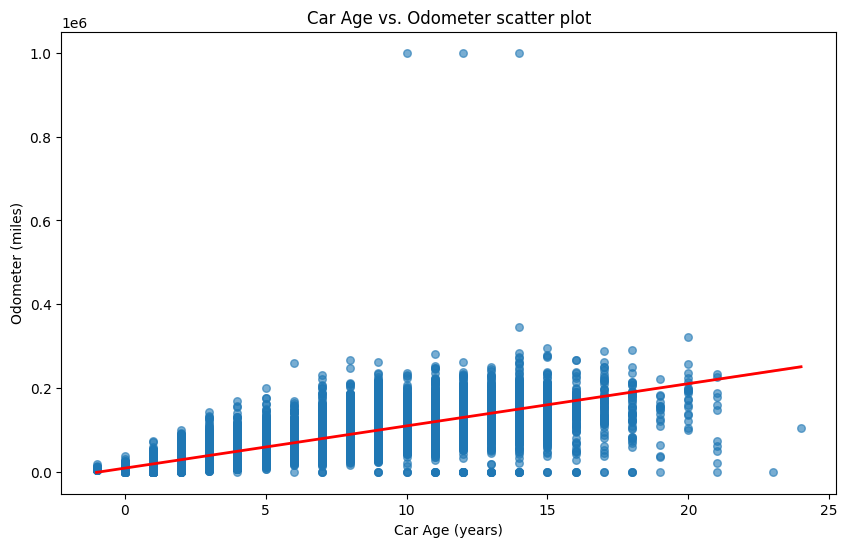

In [5]:
# creating a scatter plot with trend line for car age column
""" plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(x=df['car_age'], y=df['odometer'], alpha=0.6, s=30)
plt.title('Car Age vs. Odometer Reading')
plt.xlabel('Car Age (years)')
plt.ylabel('Odometer Reading (miles)')
plt.grid(True, alpha=0.3)

# using a seaborn function for regression plot (trend line)
sns.regplot(x=df['car_age'], y=df['odometer'], 
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.show() """

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# pure seaborn to draw this scatter plot with the trend line
plt.figure(figsize=(10, 6))
sns.regplot(x='car_age', y='odometer', data=df,
            scatter_kws={'alpha': 0.6, 's': 30},
            line_kws={'color': 'red', 'linewidth': 2})
plt.title('Car Age vs. Odometer scatter plot')
plt.xlabel('Car Age (years)')
plt.ylabel('Odometer (miles)')
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Car age and odometer reading have a posotive relationship ------> older cars tend to have higher milages
# 2. Most cars accumulate over 200k miles within the first 5 years
# 3. There's little to no increases in odometer reading after year 5
# 4. There are some cars over 20 years old with extremely low milages (likely collector's editions or classics)
#-----------------------------------------------------------------------------------

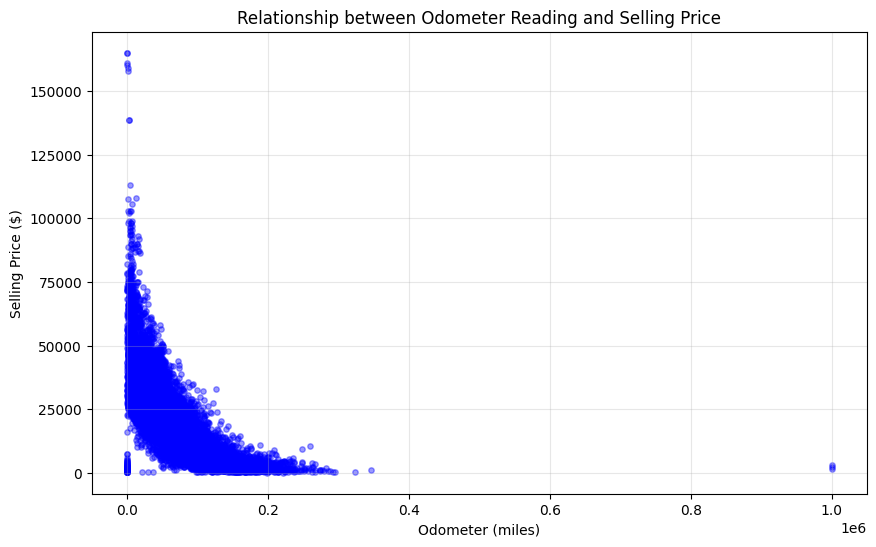

expensive cars: 8
       car_age  selling_price  odometer model
5653         1         165000      60.0    i8
8926         1         159000     530.0    i8
8928         1         160000     124.0    i8
10511        1         165000     154.0    i8
11106        1         158000     603.0    i8
13234        1         161000     303.0    i8
19567        1         138500    2119.0    i8
20596        1         138500    2944.0    i8
High-mileage expensive cars (>100k miles, >$50k): 0
Low-mileage cheap cars (<20k miles, <$15k): 64


In [6]:
# creating a scatter plot for selling price and odometer columns to find their relationsships
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['selling_price'], alpha=0.4, s=15, color='blue')
plt.title('Relationship between Odometer Reading and Selling Price')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price ($)')
plt.grid(True, alpha=0.3)
plt.show()

##################################### ANALYSIS ##################################### 

# Finding cars with price > $125k
expensive_cars = df[df['selling_price'] >= 125000]
print(f"expensive cars: {len(expensive_cars)}")
print(expensive_cars[['car_age', 'selling_price', 'odometer', 'model']])

# High-price, high-mileage outliers (potential data errors or special cases)
high_mileage_expensive = df[(df['odometer'] > 100000) & (df['selling_price'] > 50000)]
print(f"High-mileage expensive cars (>100k miles, >$50k): {len(high_mileage_expensive)}")

# Low-price, low-mileage outliers (potential bargains or issues)
low_mileage_cheap = df[(df['odometer'] < 20000) & (df['selling_price'] < 15000)]
print(f"Low-mileage cheap cars (<20k miles, <$15k): {len(low_mileage_cheap)}")

#-----------------------------------------------------------------------------------
# 1. There is a strong negetive relationship: as milage increases the selling price decreases
# 2. Vehicles lose a significant portion of their value within the first 50k miles
# 3. The price decline slows down after 50k miles
# 4. Prices approach a floor around 150k miles
# 5. The most expensive cars are i8s with extremely low milage which makes sense as they are
#    premium vehicles with limited production
#-----------------------------------------------------------------------------------

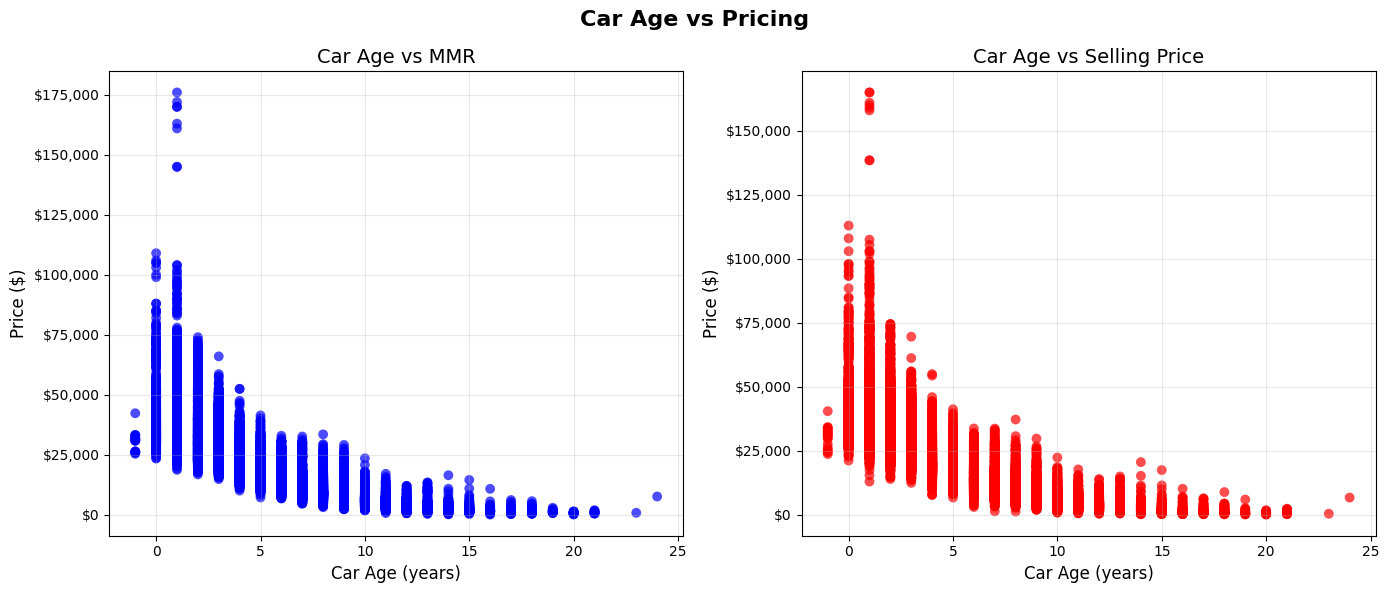

mmr variance:  212196630.3506786
selling price variance:  214904363.37210467


In [ ]:
# Create 2 scatter plots for car age vs mmr and selling price
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Car Age vs Pricing', fontsize=16, fontweight='bold')

# Variables to plot
variables = ['mmr', 'selling_price']
titles = ['Car Age vs MMR', 'Car Age vs Selling Price']
colors = ['blue', 'red']

# lopping through subplots
for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    axes[i].scatter(df['car_age'], df[var], alpha=0.7, color=color, s=50, edgecolors='none')

    # adding labels and title
    axes[i].set_xlabel('Car Age (years)', fontsize=12)
    axes[i].set_ylabel('Price ($)', fontsize=12)
    axes[i].set_title(title, fontsize=14)
    
    # Format y-axis: format numbers as currencies with dollar sign, commas and 0 decimal places
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
    
    # Adding grid
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

print(f"mmr variance: ", df['mmr'].var())
print(f"selling price variance: ", df['selling_price'].var())

#-----------------------------------------------------------------------------------
# 1. Both mmr and selling price show strong negative relationship with car age
# 2. 0-2 year old cars show a rapid drop in value
# 3. 2-4 year-old cars depreciate, but at a slower rate compared to new cars
# 4. The value of cars older than 10 years stabilizes and doesn't drop significantly further
# 5. The selling price mirrors the MMR valuation but with more variance
# 6. The maximum selling price is usually lower than the maximum MMR estimate
#-----------------------------------------------------------------------------------

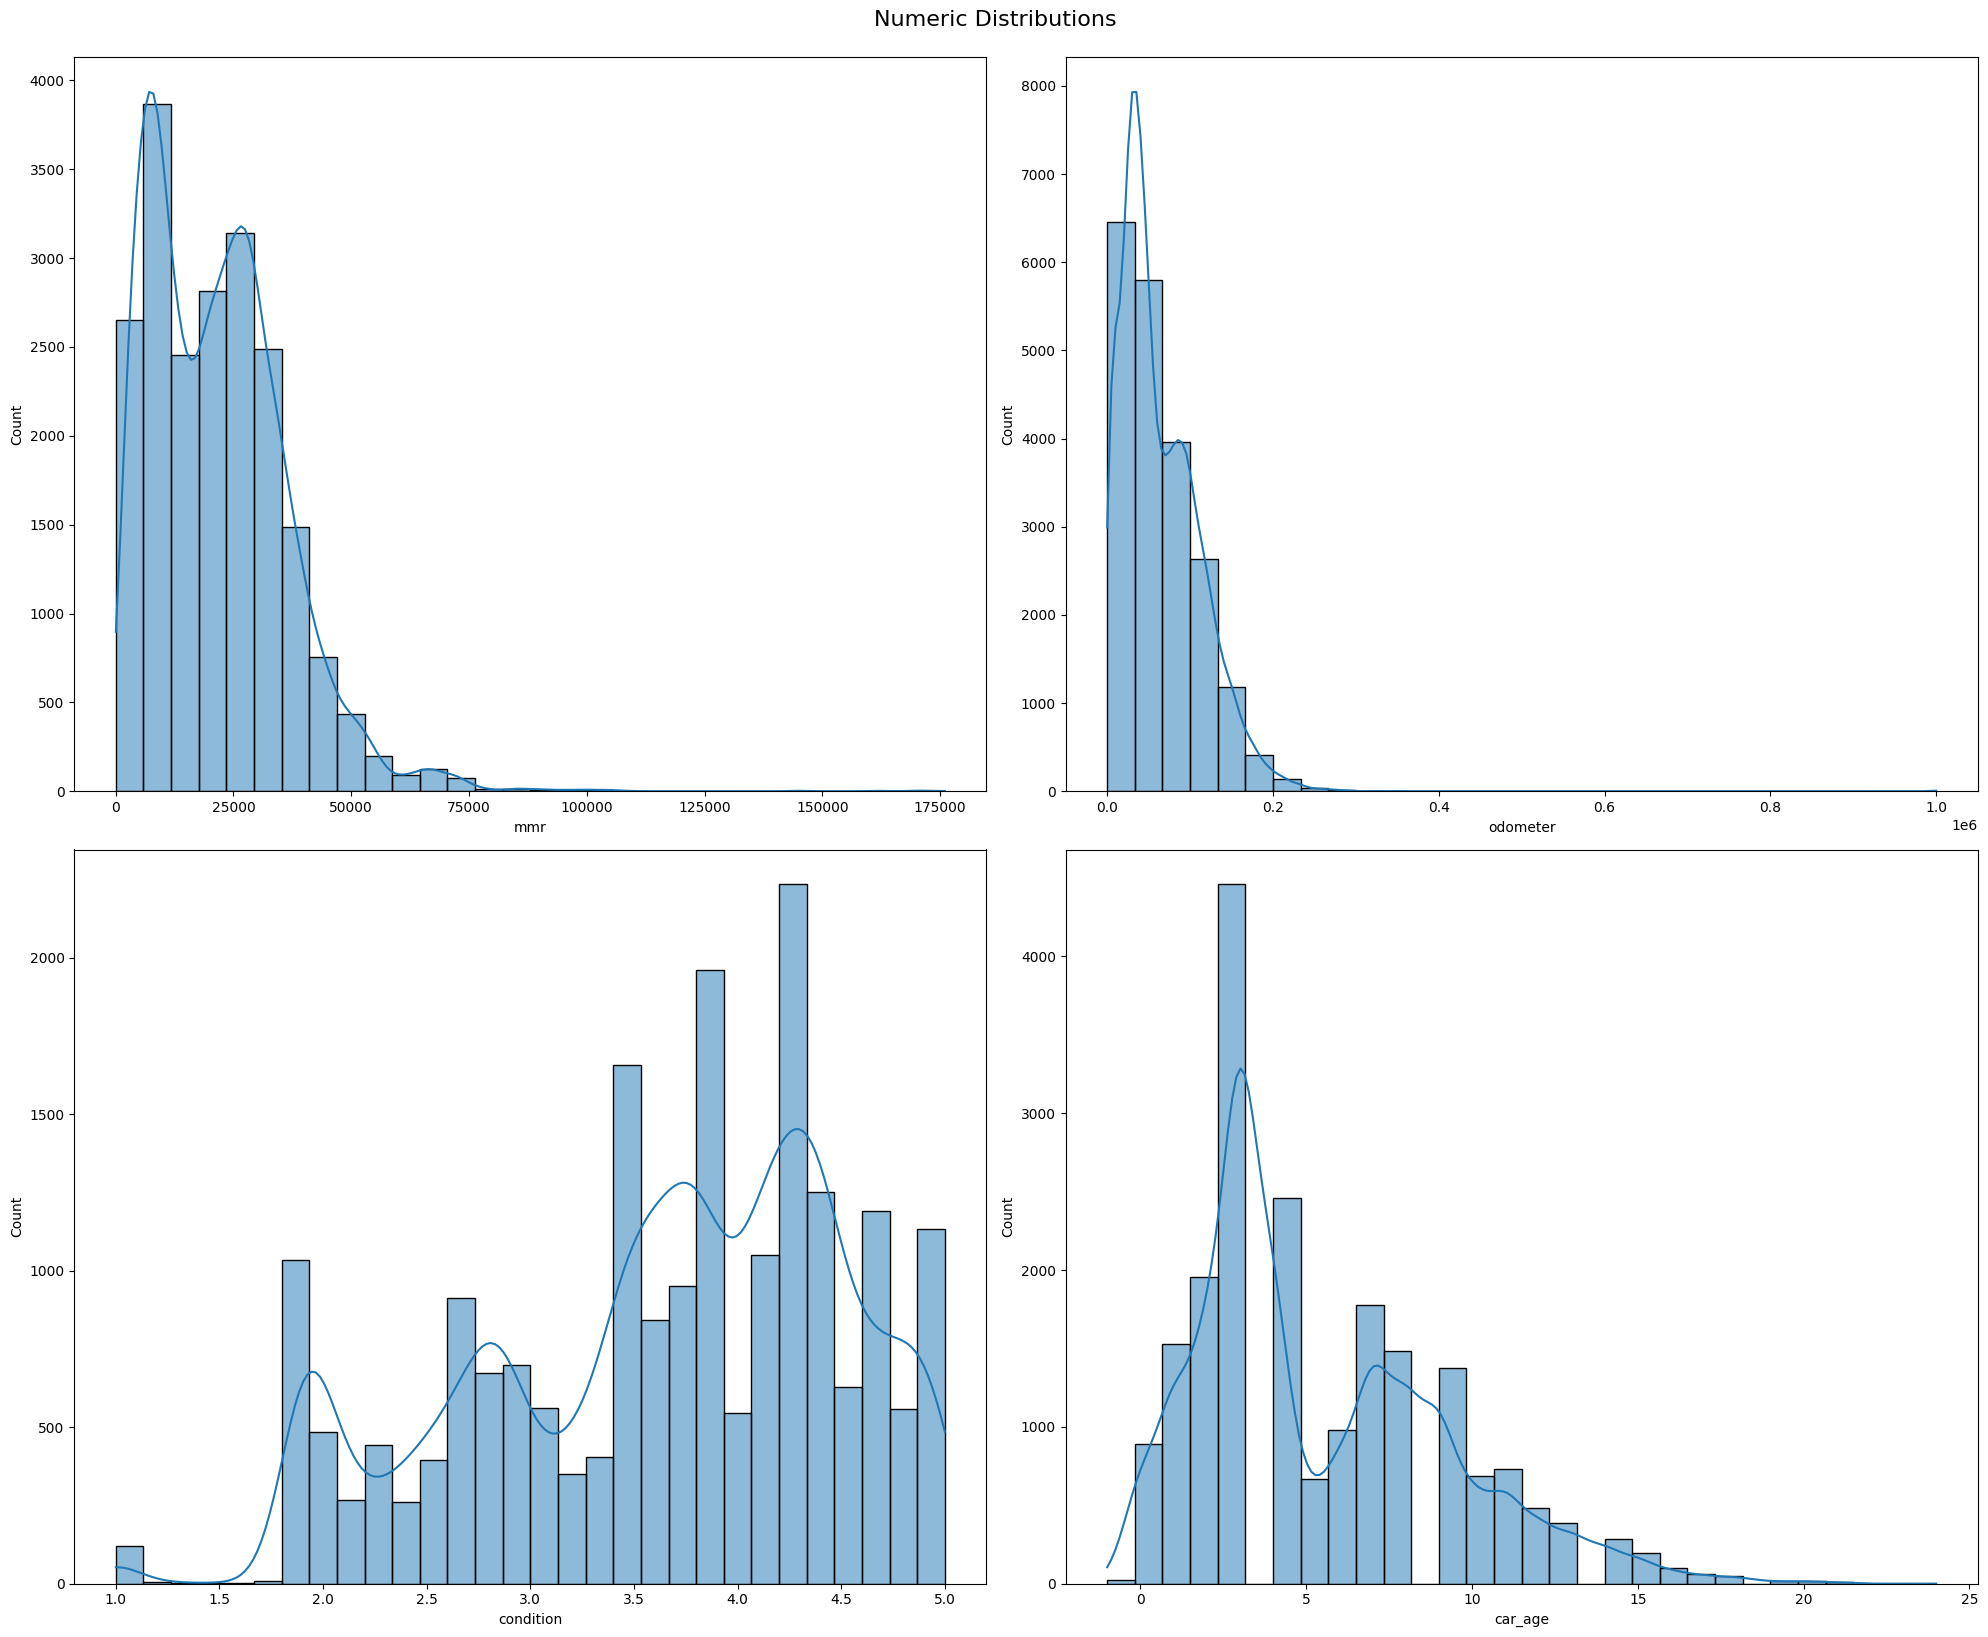

In [8]:
# Numeric distributions
numeric_cols = ['mmr', 'odometer', 'condition', 'car_age']

fig, axes = plt.subplots(2, 2, figsize=(20, 16))    # creating a 2x2 grid of subplots
axes = axes.ravel()                                 # transform 2D axes array into 1D for better iteration

# loop through column and create histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_xlabel(col)
    
plt.tight_layout()  # adjust spacing between plots
plt.suptitle('Numeric Distributions', fontsize=16, y=1.02)
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. The price distribution has a peak at lower values, with a long tail of a few luxury cars with high prices
# 2. Most cars have between 0-60k miles
# 3. Most cars are between 2-5 years old
# 4. The condition rating is peaked around 3.7-4.3
#-----------------------------------------------------------------------------------

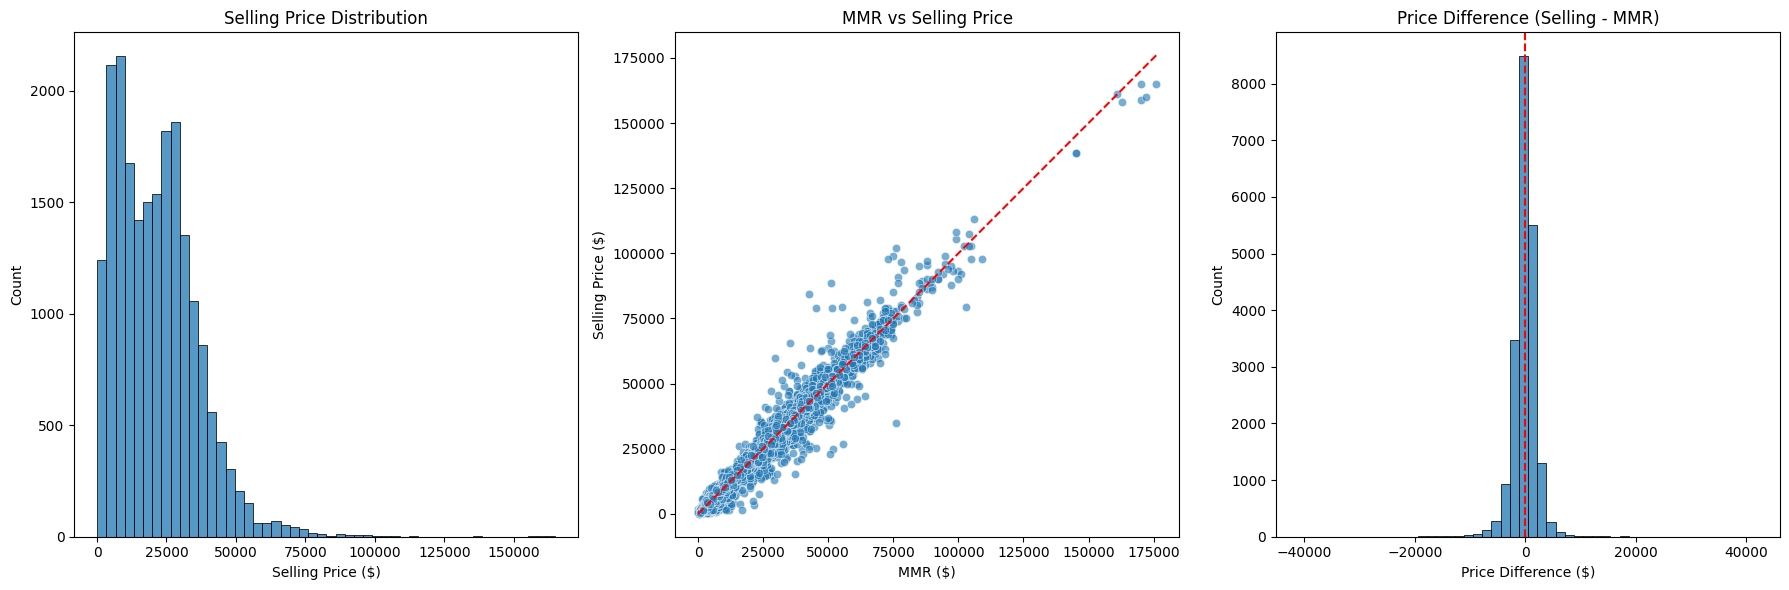

In [9]:
# Price distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Selling price distribution ---> histogram
sns.histplot(df['selling_price'], bins=50, ax=axes[0])
axes[0].set_title('Selling Price Distribution')
axes[0].set_xlabel('Selling Price ($)')

# MMR vs Selling Price ----> scatter 
sns.scatterplot(x='mmr', y='selling_price', data=df, alpha=0.6, ax=axes[1])
axes[1].plot([df['mmr'].min(), df['mmr'].max()], [df['mmr'].min(), df['mmr'].max()], 'r--')    # red reference line
axes[1].set_title('MMR vs Selling Price')
axes[1].set_xlabel('MMR ($)')
axes[1].set_ylabel('Selling Price ($)')

# Price difference distribution ----> histogram
sns.histplot(df['price_difference'], bins=50, ax=axes[2])
axes[2].axvline(0, color='red', linestyle='--')             # red vertical line
axes[2].set_title('Price Difference (Selling - MMR)')
axes[2].set_xlabel('Price Difference ($)')

plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. The majority of sales are in the $20k-$40k range
# 2. A long tail in the price distribution shows luxury vehicles with price > $75k
# 3. Both luxury cars (>$75k) and cheaper cars (<$25k) are generally sold for less than their MMR-estimated value
# 4. Based on price difference, MMR is generally a reliable predictor,
#    most cars are sold with 0 price difference but some cars are sold with $5k differnece
#-----------------------------------------------------------------------------------

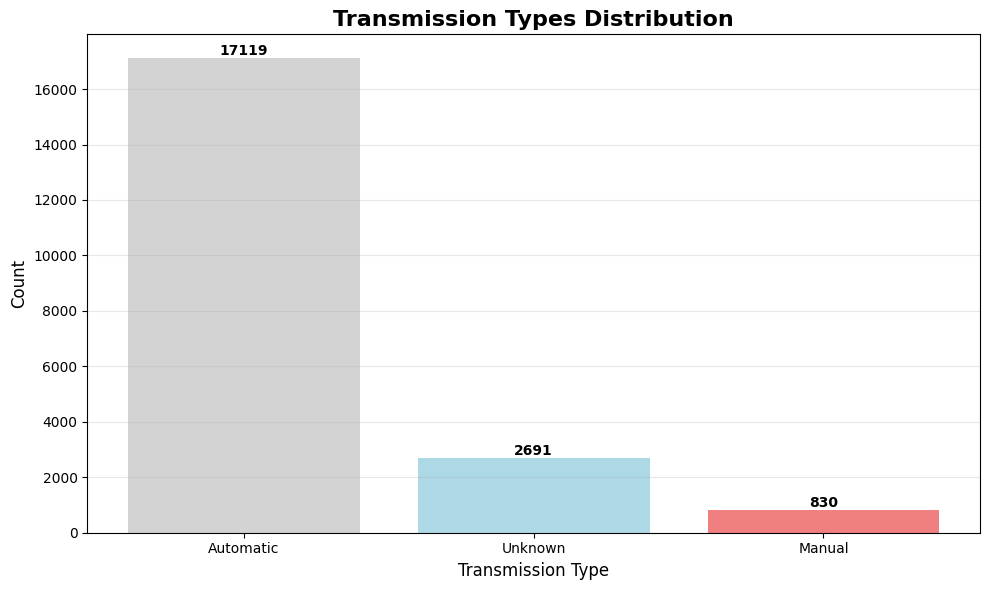

In [10]:
# Transmission bar plot
plt.figure(figsize=(10, 6))
transmission_counts = df['transmission'].value_counts()    # counting each transmission type

# Createing the bar plot itself
bars = plt.bar(['Automatic', 'Unknown', 'Manual', ], transmission_counts.values, 
               color=['lightgray', 'lightblue', 'lightcoral'])

# Add values on top of bars
for bar, count in zip(bars, transmission_counts.values):                 # pair each plot with its corresponsing count
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,      # calculate center of each bar and put text 5 units above
             f'{count}', ha='center', va='bottom', fontweight='bold')

# addding labels and titles
plt.title('Transmission Types Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Automatic transmissions dominate the market (~85%), which aligns with the prevalence of family cars like SUVs
# 2. Manual transmisiosn are far less common with only 4%
#-----------------------------------------------------------------------------------

Text(0.5, 1.0, 'Transmission Types')

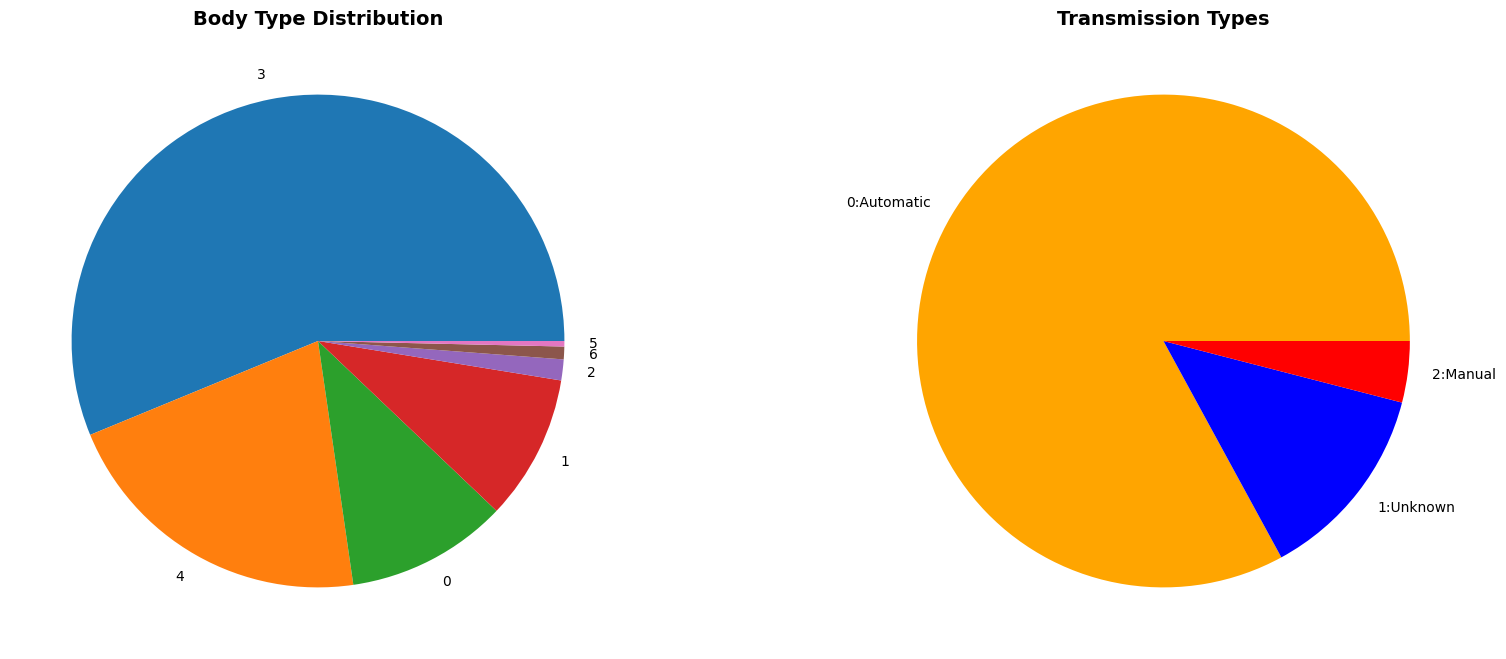

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Body Type Distribution
body_counts = df['body'].value_counts()    # counting values in body column
axes[0].pie(body_counts.values,
            labels = [str(x) for x in body_counts.index])
axes[0].set_title('Body Type Distribution', fontweight='bold', fontsize=14)

# Transmission Types distribution
transmission_counts = df['transmission'].value_counts()    # counting values in transmission column
axes[1].pie(transmission_counts.values,
            labels=['0:Automatic', '1:Unknown', '2:Manual'], 
            colors=['orange', 'blue', 'red'])
axes[1].set_title('Transmission Types', fontweight='bold', fontsize=14)

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Sedan and suv body types are the most common, and wagons are the least common
# 2. Since most of our vehicles are SUVs that confirm the automatic transmision,
#    which is best for a family car
#-----------------------------------------------------------------------------------

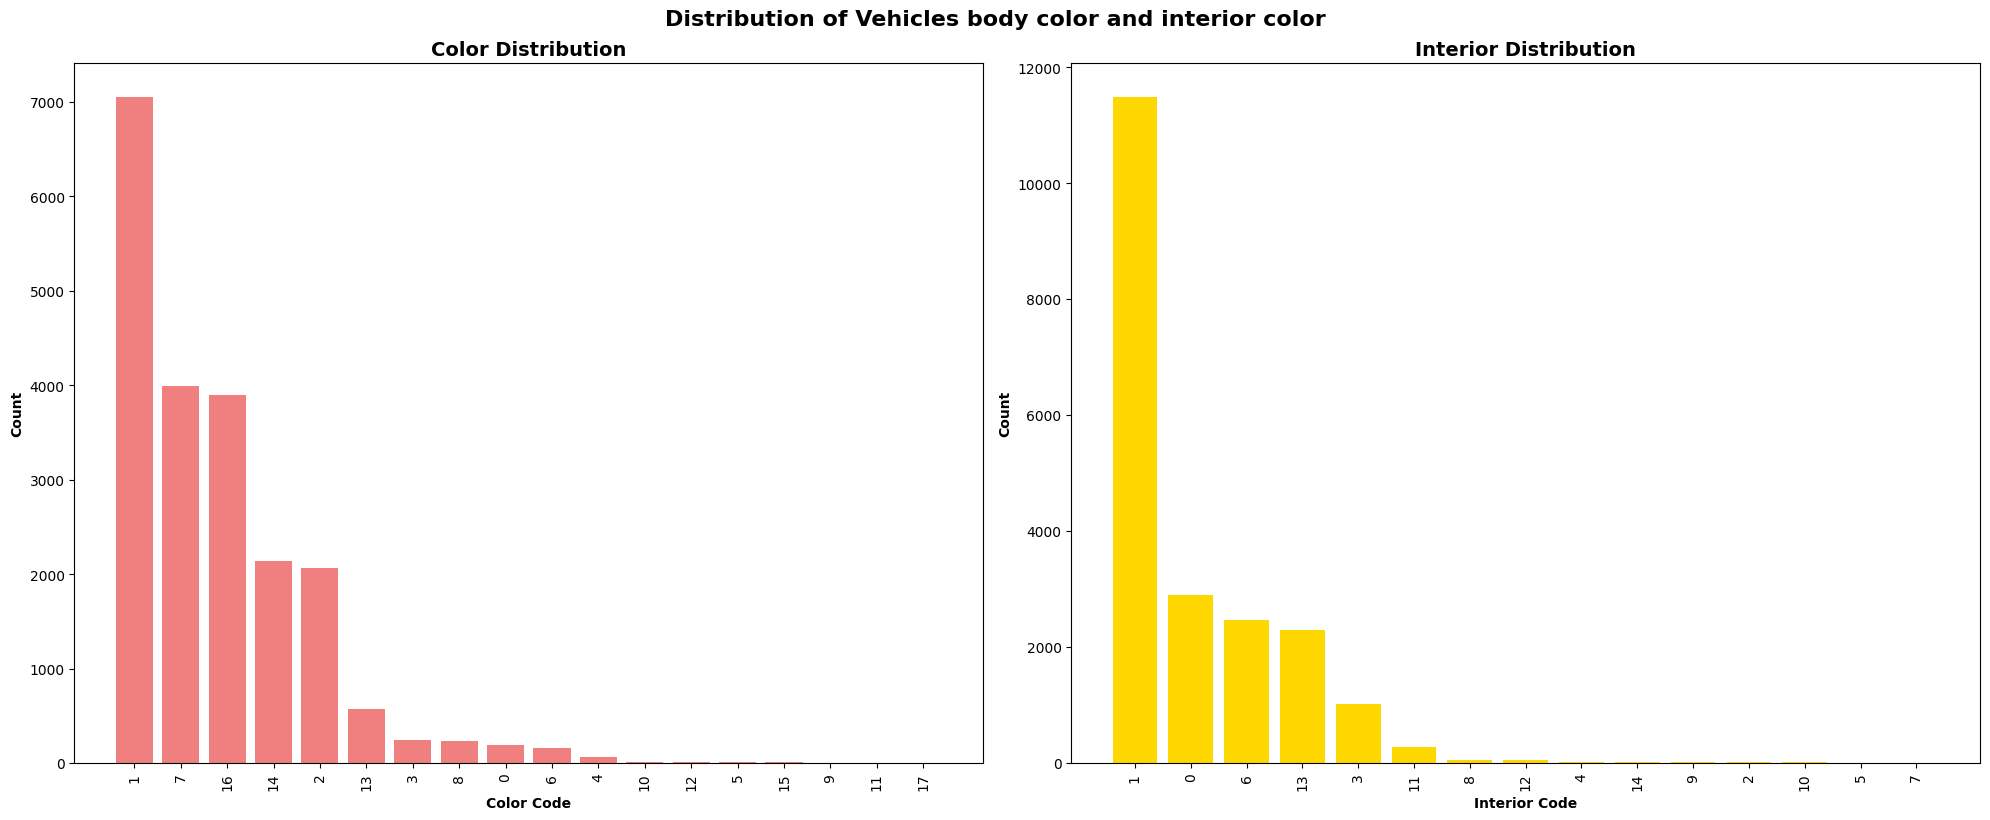

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Color Distribution ----> bar chart
color_counts = df['color'].value_counts()
axes[0].bar([str(x) for x in color_counts.index], color_counts.values, color='lightcoral')

# setting labels and title
axes[0].set_title('Color Distribution', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Color Code', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].tick_params(axis='x', rotation=90)    # rotate x labels by 90 degrees

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Interior Distribution ----> bar chart
interior_counts = df['interior'].value_counts()
axes[1].bar([str(x) for x in interior_counts.index], interior_counts.values, color='gold')

# setting labels and title
axes[1].set_title('Interior Distribution', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Interior Code', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].tick_params(axis='x', rotation=90)    # rotate x labels by 90 degrees


plt.tight_layout()
plt.suptitle('Distribution of Vehicles body color and interior color', fontsize=16, fontweight='bold', y=1.02)
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Black is the most common exterior color, followed equally by gray and white
# 2. Colors like yellow, pink, turquoise and some other are the least common likely because they are
#     custom made from the factory for that particular buyer
# 3. Black interior is the most common by far, with over 10k vehicles
# 4. Interior colors like green, gold, purple, and blue are the least common, probably because they are
#    less versatile and don't match most ecterior colors
#-----------------------------------------------------------------------------------

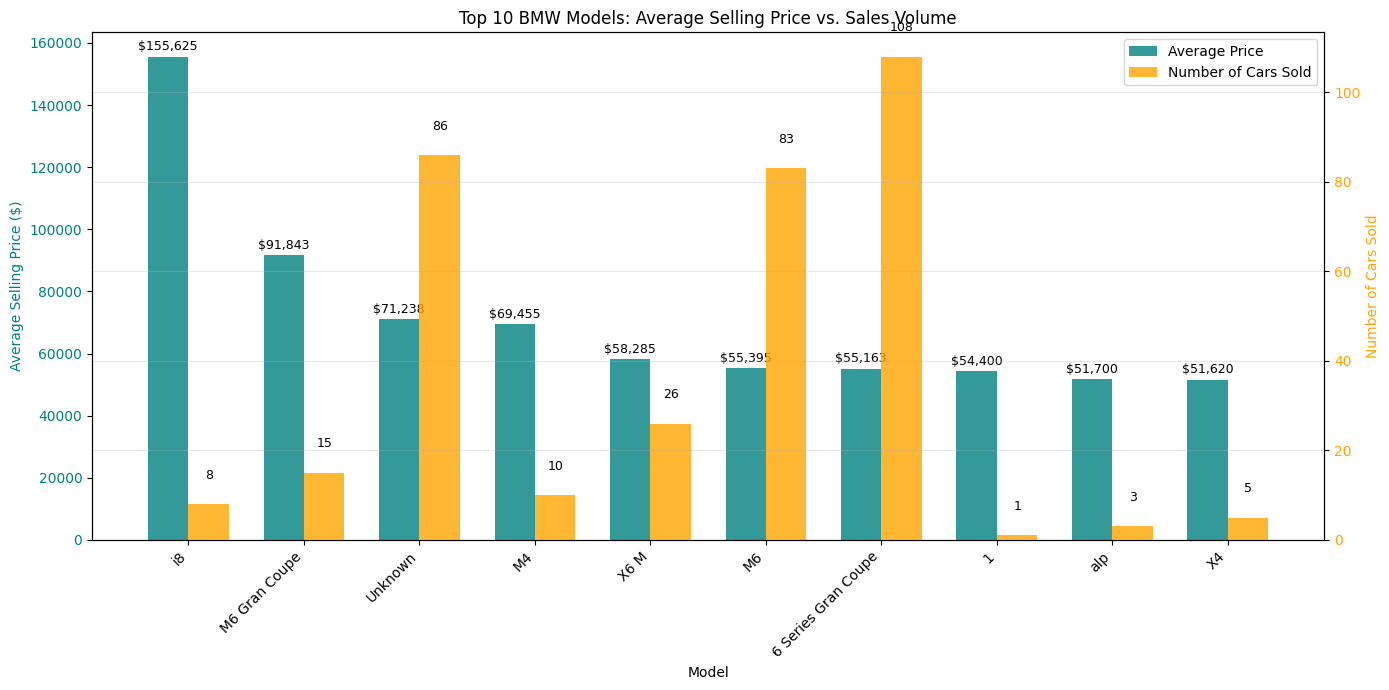

In [13]:
plt.figure(figsize=(14, 7))

# Get top 10 models by average price
# group my model - calculate avg price - sort by decending - get top 10
top_models_avg = df.groupby('model')['selling_price'].mean().sort_values(ascending=False).head(10)
# Get the count of those same top models to see how many vehicles they sold
top_models_count = df[df['model'].isin(top_models_avg.index)].groupby('model')['selling_price'].count().reindex(top_models_avg.index)

# Set the width of the bars
width = 0.35
x = np.arange(len(top_models_avg.index))

# Create subplots
ax1 = plt.subplot()
ax2 = ax1.twinx() # Create a second y-axis that shares the same x-axis

# Plot Average Price on first axis (left)
bars1 = ax1.bar(x - width/2, top_models_avg.values, width, color='teal', label='Average Price', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('Average Selling Price ($)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticks(x)
ax1.set_xticklabels(top_models_avg.index, rotation=45, ha='right')

# Plot Count on second axis (right)
bars2 = ax2.bar(x + width/2, top_models_count.values, width, color='orange', label='Number of Cars Sold', alpha=0.8)
ax2.set_ylabel('Number of Cars Sold', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add value labels on top of the bars
for i, v in enumerate(top_models_avg.values):
    # adding avg price 1000$ avobe bar tops
    ax1.text(i - width/2, v + 1000, f'${v:,.0f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(top_models_count.values):
    # adding count 5 units above bat tops
    ax2.text(i + width/2, v + 5, f'{v}', ha='center', va='bottom', fontsize=9)

plt.title('Top 10 BMW Models: Average Selling Price vs. Sales Volume')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Bmw i8 sold only 8 units but at a very high average price, confirming its status a luxury or collector car
# 2. M6 and 6 series Gran Coupe sold almost 200 units combined at a similarly high average price
# 3. Bmw X4 sold only 5 untis with a low average price, likely becuase competitors like the X3 and X5
#     series offer better value
#-----------------------------------------------------------------------------------

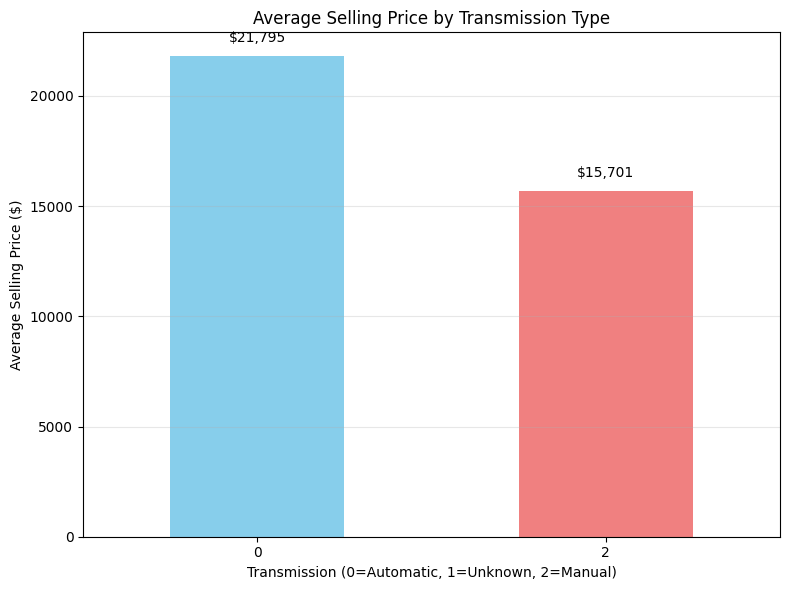

In [14]:
plt.figure(figsize=(8, 6))

# Calculate the average price for each transmission type
transmission_means = df[df['transmission'].isin([0, 2])].groupby('transmission')['selling_price'].mean()

# Create the bar chart
transmission_means.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission (0=Automatic, 1=Unknown, 2=Manual)')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=0)

# Add the value on top of each bar
# add price 500 units above bar tops with proper formatting (adding $ and commas)
for i, v in enumerate(transmission_means):
    plt.text(i, v + 500, f'${v:,.0f}', ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Automatic transmisions have a higher average price becuase they're a more expensive option
# 2. Manual transmision are basically the budget build
#-----------------------------------------------------------------------------------

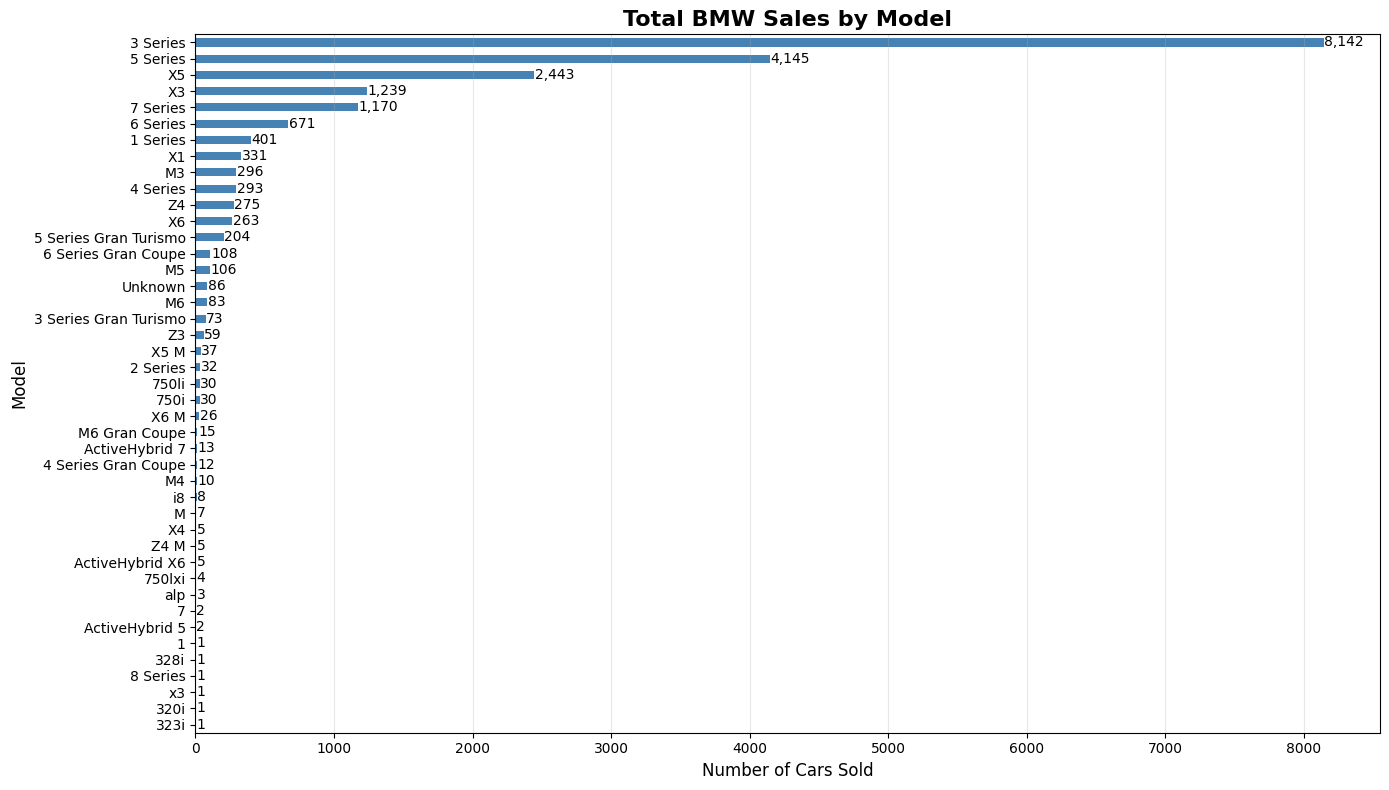

0.3944767441860465


In [15]:
plt.figure(figsize=(14, 8))

# Calculate total sales per model and sort ascending
model_counts = df['model'].value_counts().sort_values(ascending=True)

# Create horizontal bar chart
model_counts.plot(kind='barh', color='steelblue')
plt.title('Total BMW Sales by Model', fontsize=16, fontweight='bold')
plt.xlabel('Number of Cars Sold', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add value labels at the end of each bar
# adding sale count 5 units to the right of bar end
for i, v in enumerate(model_counts):
    plt.text(v + 5, i, f'{v:,}', ha='left', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

series_3_count = len(df[df['model'] == '3 Series'])
series_3_perc = series_3_count / len(df['model']) 
print(series_3_perc)

#-----------------------------------------------------------------------------------
# 1. 3 series is top selling bmw model 8142 vehicle sold (~ 40%)
# 2. Models like 320i and 323i have lower sales potentially do to being unreliable or
#    having lower values per dollar spent
# 3. M series cars have lower total sales because they're more expensive
# 4. Niche vehicles like 'Gran Coupes', 'Gran Turismo' or 'ActiveHybrid' have extremely
#    low sales volume which is expected for a specialized car
# 5. The M3 was the best selling M-powered vehicle with nearly 300 sales
#-----------------------------------------------------------------------------------

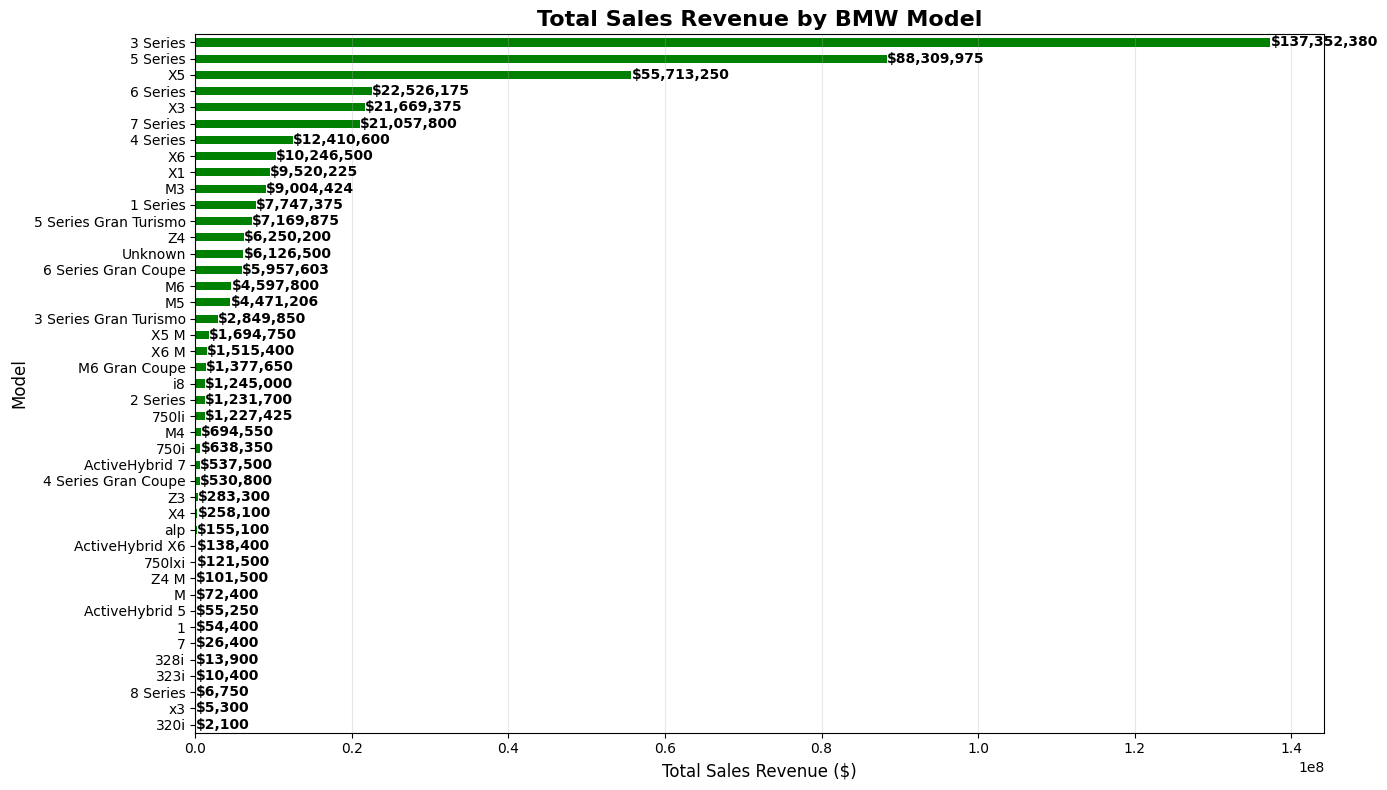

In [16]:
plt.figure(figsize=(14, 8))

# Calculate total sales revenue per model and sort ascending
model_revenue = df.groupby('model')['selling_price'].sum().sort_values(ascending=True)

# Create horizontal bar chart
model_revenue.plot(kind='barh', color='green')
plt.title('Total Sales Revenue by BMW Model', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales Revenue ($)', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add value labels 5000 units to the right of bar end(with $ and commas)
for i, v in enumerate(model_revenue):
    plt.text(v + 5000, i, f'${v:,.0f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. The 3 series generated over $137M in revenue which is expected given its high sales volume
# 2. Bmw X5 is the leading SUV in terms of revenue generating $88M
# 3. The 5 series generated significantly more total revenue than the 2 best selling SUVs (X5 and X3) combined
#-----------------------------------------------------------------------------------

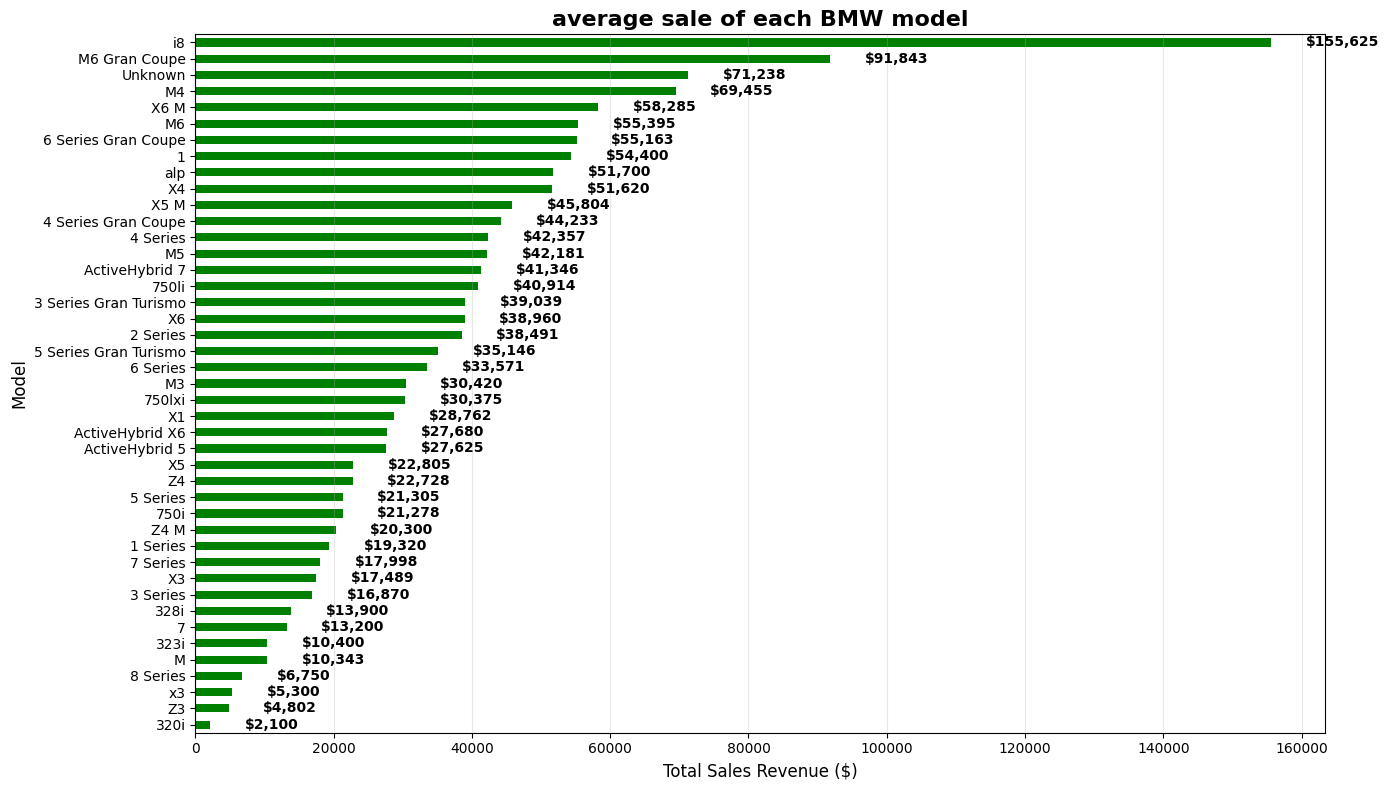

In [17]:
plt.figure(figsize=(14, 8))

# Calculate total sales revenue per model and sort ascending
model_revenue = df.groupby('model')['selling_price'].mean().sort_values(ascending=True)

# Create horizontal bar chart
model_revenue.plot(kind='barh', color='green')
plt.title('average sale of each BMW model', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales Revenue ($)', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Add value labels 5000 units to the right of bar end(with $ and commas)
for i, v in enumerate(model_revenue):
    plt.text(v + 5000, i, f'${v:,.0f}', ha='left', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. The 3 series and 5 series is dominating the market with its total sale and low price average
#    offering a combination of affordability and brand appeal
# 2. X5 comes after 3 series and 5 series which makes it a good family car with its low price average
# 3. The i8 has a very high average price but low revenue meaning very few were sold
# 4. The reason M4 had really low sales (compared to other M-powered cars) was because of high average price
# 5. Even though ActiveHybrid vehicles have relatively low average price, they still sold in low volume
#-----------------------------------------------------------------------------------

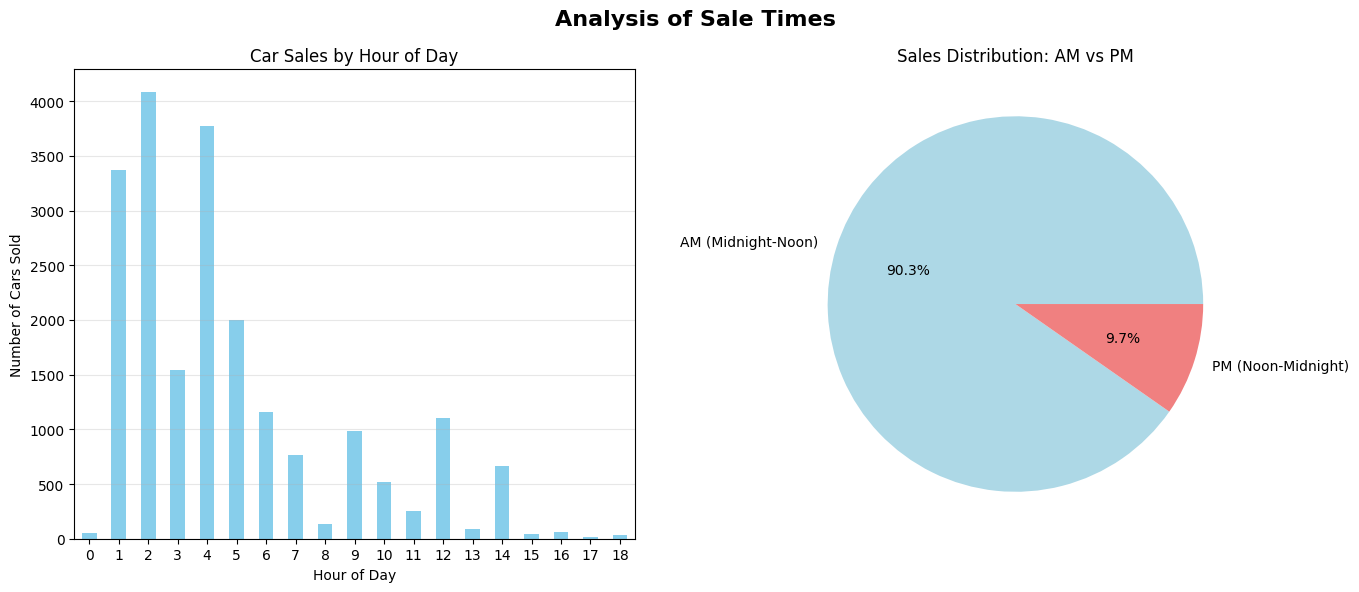

In [18]:
# Convert sale_time_only to datetime format for analysis
df['sale_time_dt'] = pd.to_datetime(df['sale_time_only'], format='%H-%M-%S')

# Extract hour from the time
df['sale_hour'] = df['sale_time_dt'].dt.hour

plt.figure(figsize=(14, 6))

# Create histogram of sale hours
plt.subplot(1, 2, 1)
df['sale_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Car Sales by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Create pie chart for AM/PM distribution
plt.subplot(1, 2, 2)
am_pm_counts = [len(df[df['sale_hour'] < 12]), len(df[df['sale_hour'] >= 12])]
plt.pie(am_pm_counts, labels=['AM (Midnight-Noon)', 'PM (Noon-Midnight)'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Sales Distribution: AM vs PM')

plt.suptitle('Analysis of Sale Times', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Most sales occur at night (1AM - 4AM)
# 2. There are some sales during work hours (12PM - 2PM) likely during lunch breaks
# 3. There are no sales after work hours (6PM)
# 4. Over 90% of car sales happen in the AM half of the day, primarily at night
#-----------------------------------------------------------------------------------

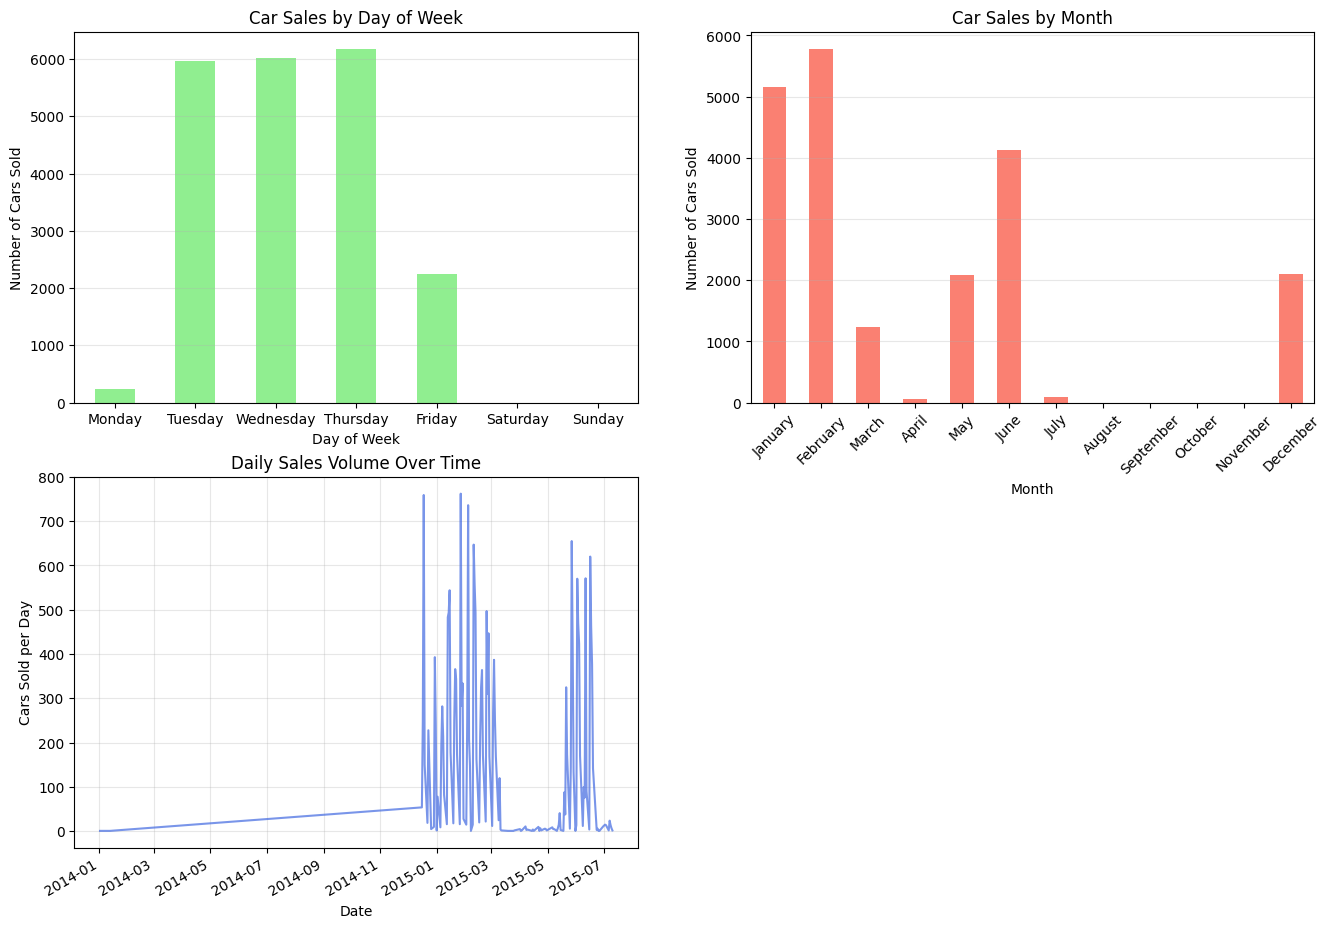

In [19]:
# Convert sale_date_only to datetime format
df['sale_date_dt'] = pd.to_datetime(df['sale_date_only'])

# Extract day of week and month
df['sale_dayofweek'] = df['sale_date_dt'].dt.day_name()
df['sale_month'] = df['sale_date_dt'].dt.month_name()

plt.figure(figsize=(16, 12))

# Sales by day of week
plt.subplot(2, 2, 1)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df['sale_dayofweek'].value_counts().reindex(day_order)
sales_by_day.plot(kind='bar', color='lightgreen')
plt.title('Car Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Sales by month
plt.subplot(2, 2, 2)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = df['sale_month'].value_counts().reindex(month_order)
sales_by_month.plot(kind='bar', color='salmon')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# daily sales volumne chart 
plt.subplot(2, 2, 3)
daily_sales = df['sale_date_dt'].value_counts().sort_index()
daily_sales.plot(kind='line', color='royalblue', alpha=0.7)
plt.title('Daily Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Cars Sold per Day')
plt.grid(True, alpha=0.3)

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Most sales happen in the middle of the week rather than on weekends.
# 2. Most sales occur in the first two months of the year (Jan and Feb).
# 3. Sales drop slightly in springs
# 4. There are almost no sales in summer
# 5. Sales start to pick up again at the end of the year (Dec)
#-----------------------------------------------------------------------------------

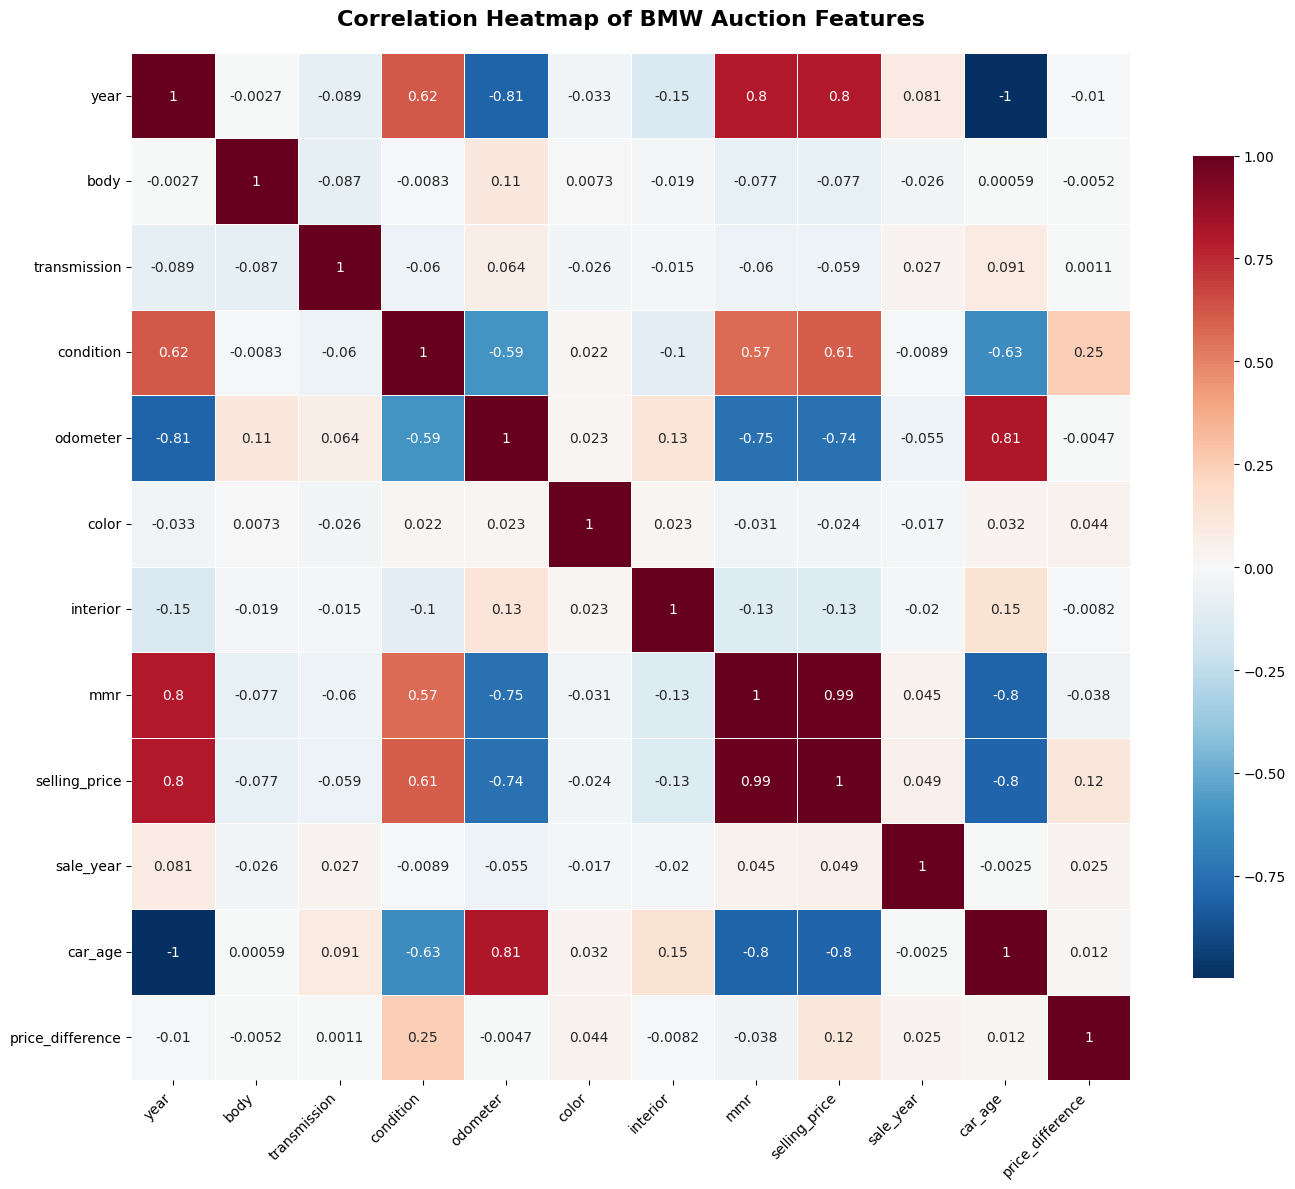

In [20]:
# Select only numerical columns for correlation analysis
numerical_columns = ['year', 'body', 'transmission', 'condition', 'odometer', 'color', 
                     'interior', 'mmr', 'selling_price', 'sale_year', 'car_age', 'price_difference']

# Create correlation matrix
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(14, 12))

# Create the heatmap with annotations
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True,                  # Show correlation values in cells
                      cmap='RdBu_r',               # Red-Blue color scheme
                      linewidths=0.5,              # Add lines between cells
                      cbar_kws={'shrink': 0.8})    # Adjust colorbar size

plt.title('Correlation Heatmap of BMW Auction Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. Odometer and car age are highly related (+0.81) which means older cars tend to have higher milages
# 2. Year is highly related to mmr and selling price (+0.8) followed by condition and odometer
# 3. Odometer has a better realtionship with mmr and selling price than condition, which means buyers prefer
#     to buy cars with lower milages rather than higher condition
# 4. Features like color, interior color, transmission, and body type show little to no linear correlation
#     with other numerical features
#-----------------------------------------------------------------------------------

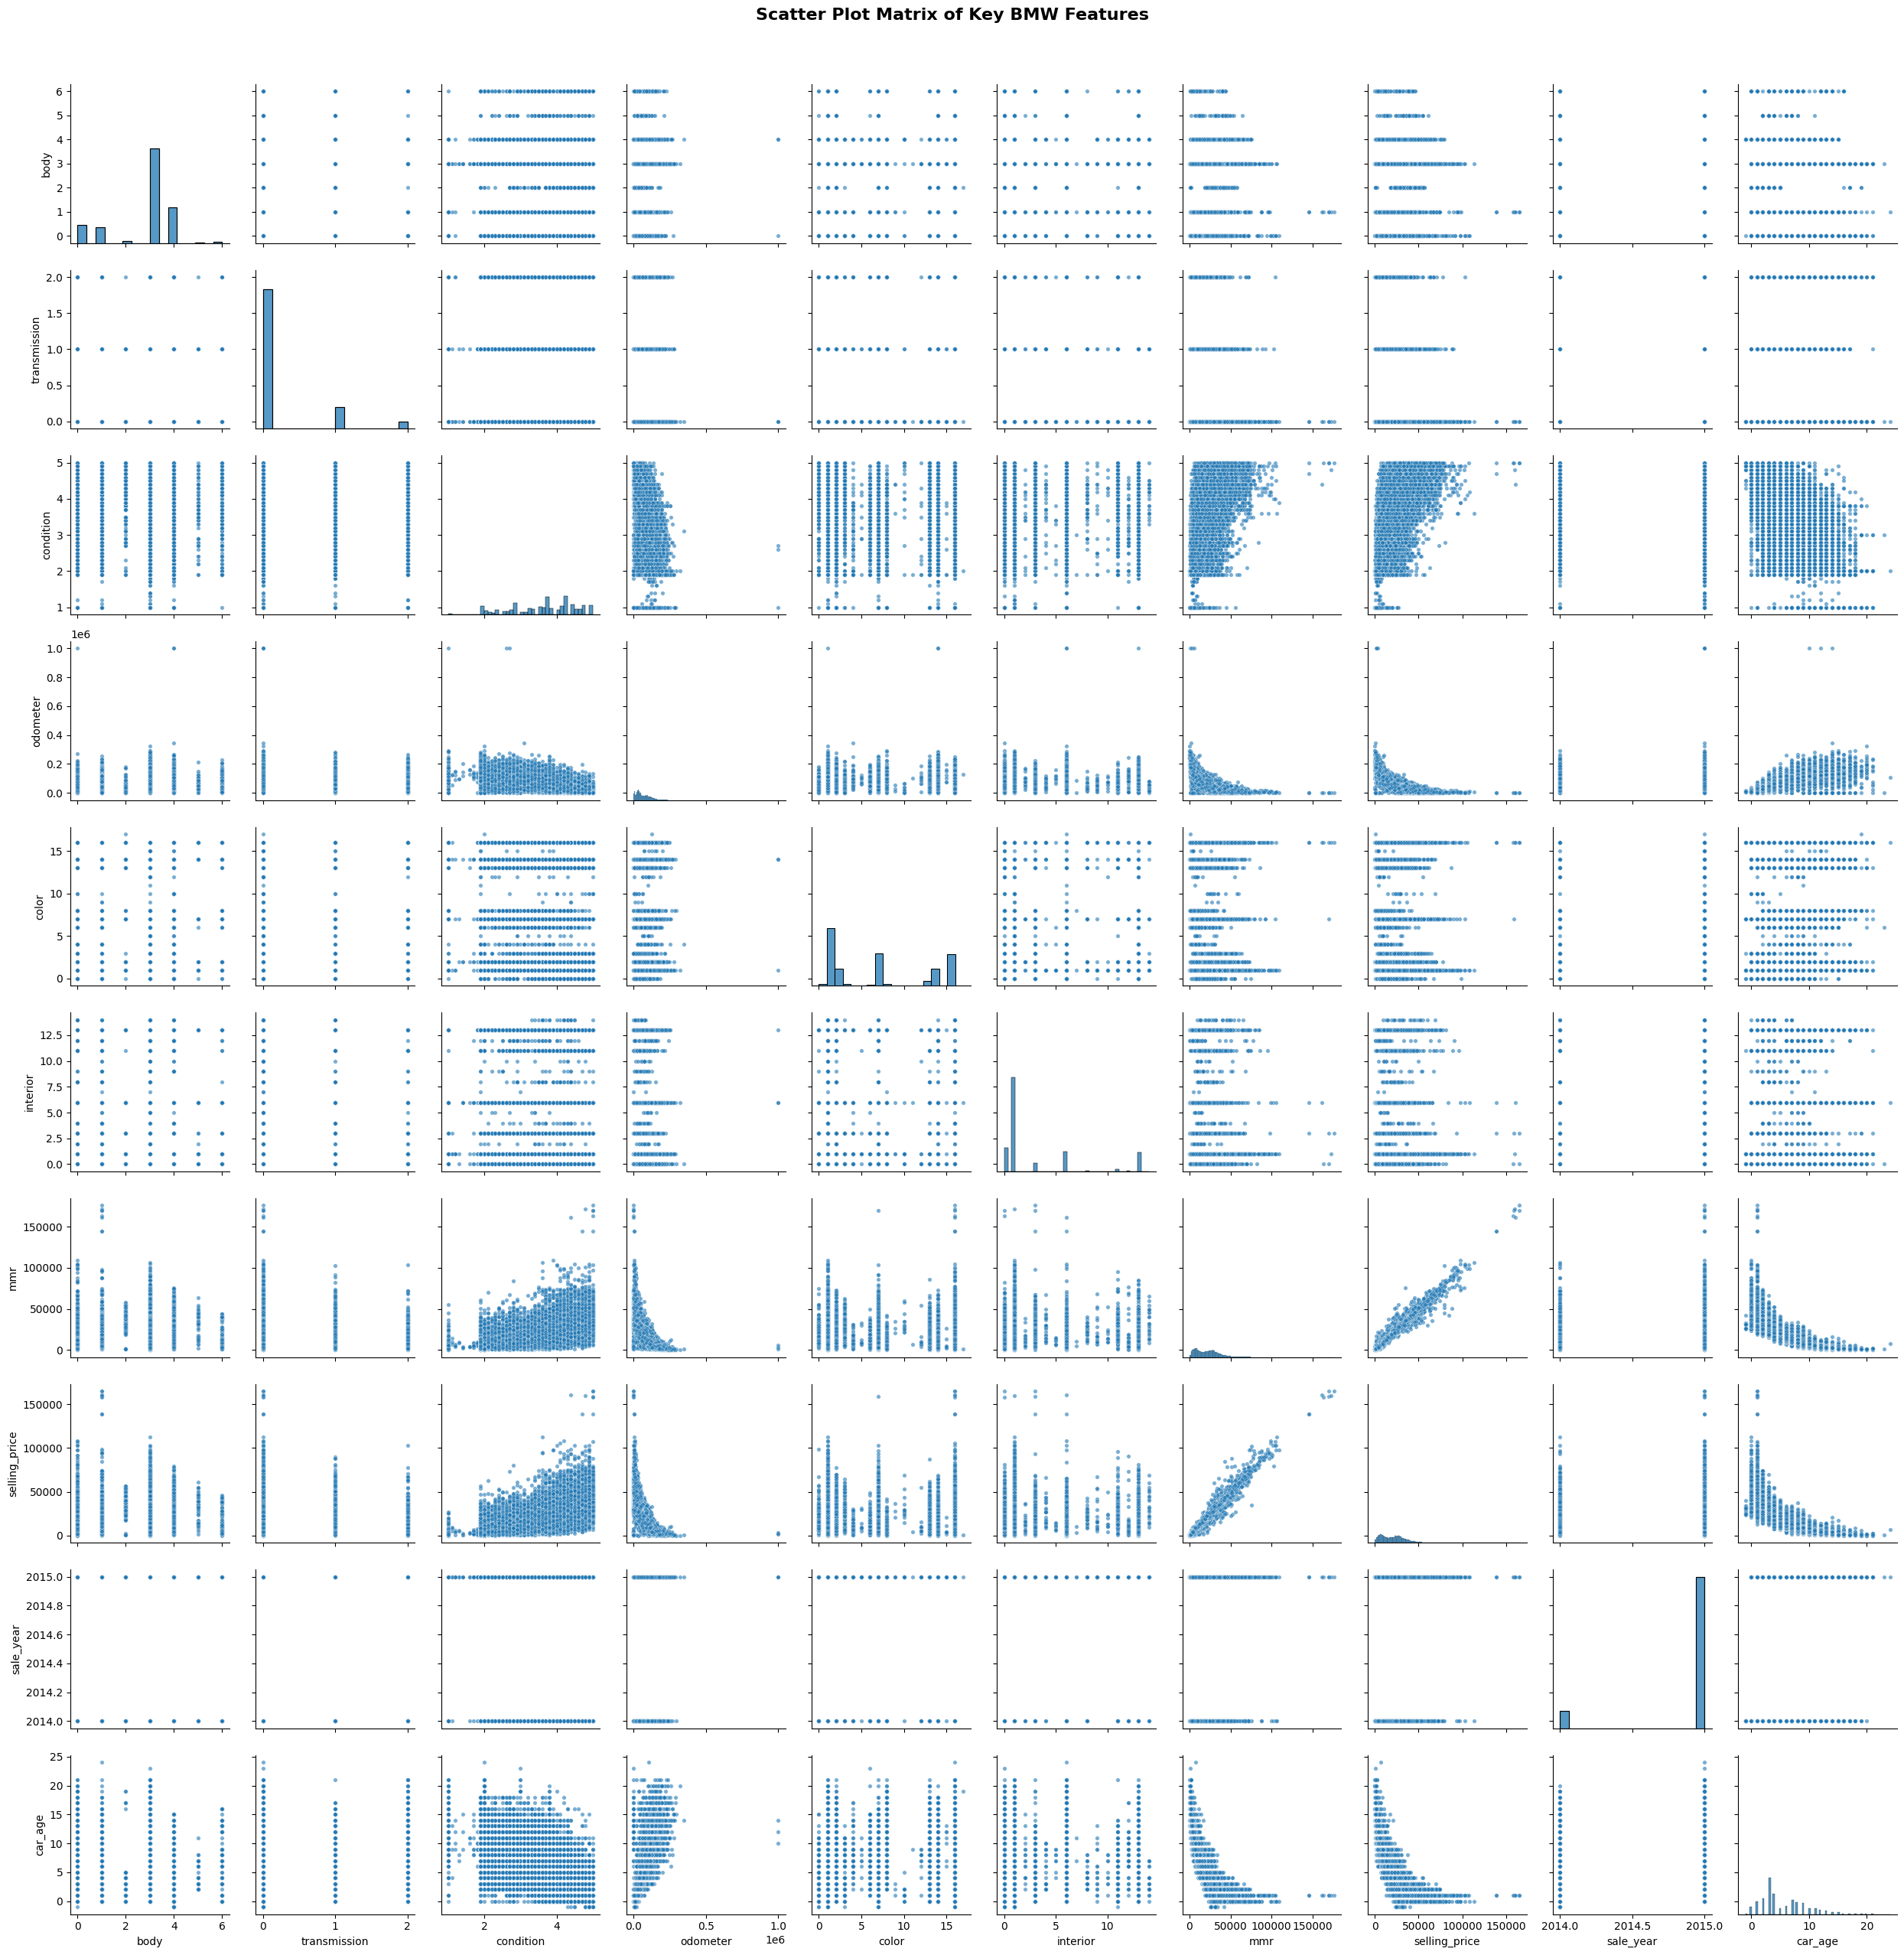

In [21]:
# creating a list of features for our pair plot analysis
features = ['body', 'transmission', 'condition', 'odometer', 'color', 
            'interior', 'mmr', 'selling_price', 'sale_year', 'car_age']

# Creating the pair plot
sns.pairplot(df[features], 
             diag_kind='hist',                  # Use histograms for diagonal
             plot_kws={'alpha': 0.6, 's': 15},  # 60% Transparency with point size of 15 pixels
             corner=False)                      # Show both upper and lower triangles

plt.suptitle('Scatter Plot Matrix of Key BMW Features', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

##################################### ANALYSIS ##################################### 

#-----------------------------------------------------------------------------------
# 1. MMR and selling price are strongly positively correlated, almost linearly
# 2. Both odometer and car age are negatively correlated with MMR and selling price
# 3. Certain body types are associated with clusters of higher-priced cars
# 4. The distribution of odometer readings is strongly right-skewed: many vehicles have low mileage,
#    with a long tail of vehicles extending to very high milages
#-----------------------------------------------------------------------------------